In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import plotly_express as px
import plotly.graph_objects as go
import time
import xgboost as xgb
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# loading data and describe data

In [41]:
data1 = pd.read_csv('flightdata2\Jan.csv')
data2 = pd.read_csv('flightdata2\Feb.csv')
data3 = pd.read_csv('flightdata2\Mar.csv')
data4 = pd.read_csv('flightdata2\Apr.csv')
data5 = pd.read_csv('flightdata2\May.csv')
data6 = pd.read_csv('flightdata2\Jun.csv')
data7 = pd.read_csv('flightdata2\Jul.csv')
data8 = pd.read_csv('flightdata2\Aug.csv')
data9 = pd.read_csv('flightdata2\Sep.csv')
data10 = pd.read_csv('flightdata2\Oct.csv')
data11 = pd.read_csv('flightdata2\\Nov.csv')
data12 = pd.read_csv('flightdata2\Dec.csv')

define the function to drop the useless information 

In [6]:
def dropyear(df):
    df.drop(['YEAR', 'MONTH', 'DAY_OF_MONTH'], axis=1, inplace=True)
    return df
dropyear(data1)
dropyear(data2)
dropyear(data3)
dropyear(data4)
dropyear(data5)
dropyear(data6)
dropyear(data7)
dropyear(data8)
dropyear(data9)
dropyear(data10)
dropyear(data11)
dropyear(data12)

,FL_DATE,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_STATE_NM,DEP_TIME,DEP_DELAY_NEW,ARR_TIME,ARR_DELAY_NEW,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 22
0,2019-12-08,N790SW,1349,15304,Florida,10397,Georgia,630.0,5.0,750.0,0.0,0.0,66.0,406.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-08,N484WN,2884,15304,Florida,10397,Georgia,1352.0,42.0,1522.0,37.0,0.0,70.0,406.0,0.0,0.0,0.0,0.0,37.0,NaN
2,2019-12-08,N7830A,3631,15304,Florida,10397,Georgia,1745.0,0.0,1921.0,1.0,0.0,73.0,406.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-08,N762SW,3874,15304,Florida,10397,Georgia,1941.0,6.0,2104.0,0.0,0.0,67.0,406.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-08,N484WN,6745,15304,Florida,10397,Georgia,910.0,0.0,1030.0,0.0,0.0,64.0,406.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67053,2019-12-31,N569JB,568,11697,Florida,10397,Georgia,2130.0,0.0,2316.0,0.0,0.0,88.0,581.0,NaN,NaN,NaN,NaN,NaN,NaN
67054,2019-12-31,N589JB,719,12478,New York,10397,Georgia,1527.0,28.0,1737.0,0.0,0.0,110.0,760.0,NaN,NaN,NaN,NaN,NaN,NaN
67055,2019-12-31,N589JB,720,10397,Georgia,12478,New York,1839.0,8.0,2037.0,0.0,0.0,101.0,760.0,NaN,NaN,NaN,NaN,NaN,NaN
67056,2019-12-31,N633JB,841,12478,New York,14685,Georgia,704.0,0.0,930.0,0.0,0.0,120.0,718.0,NaN,NaN,NaN,NaN,NaN,NaN


connect the 12 months data

In [8]:
df = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12], axis=0,ignore_index=True)
df.fillna(0,inplace= True)
df1 =df.loc[df.ORIGIN_STATE_NM=='Georgia']           ###only count the data which the flight is from Geogria
df1.shape[0]                                         ###count how vaild record we hava for one year

421768

we have weather delay, Nas delay, late aircraft delay and security delay, and we will describe each of them by category

0.0      418159
15.0         85
10.0         83
16.0         78
19.0         74
          ...  
255.0         1
185.0         1
369.0         1
734.0         1
458.0         1
Name: WEATHER_DELAY, Length: 409, dtype: int64


C:\Users\13863\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


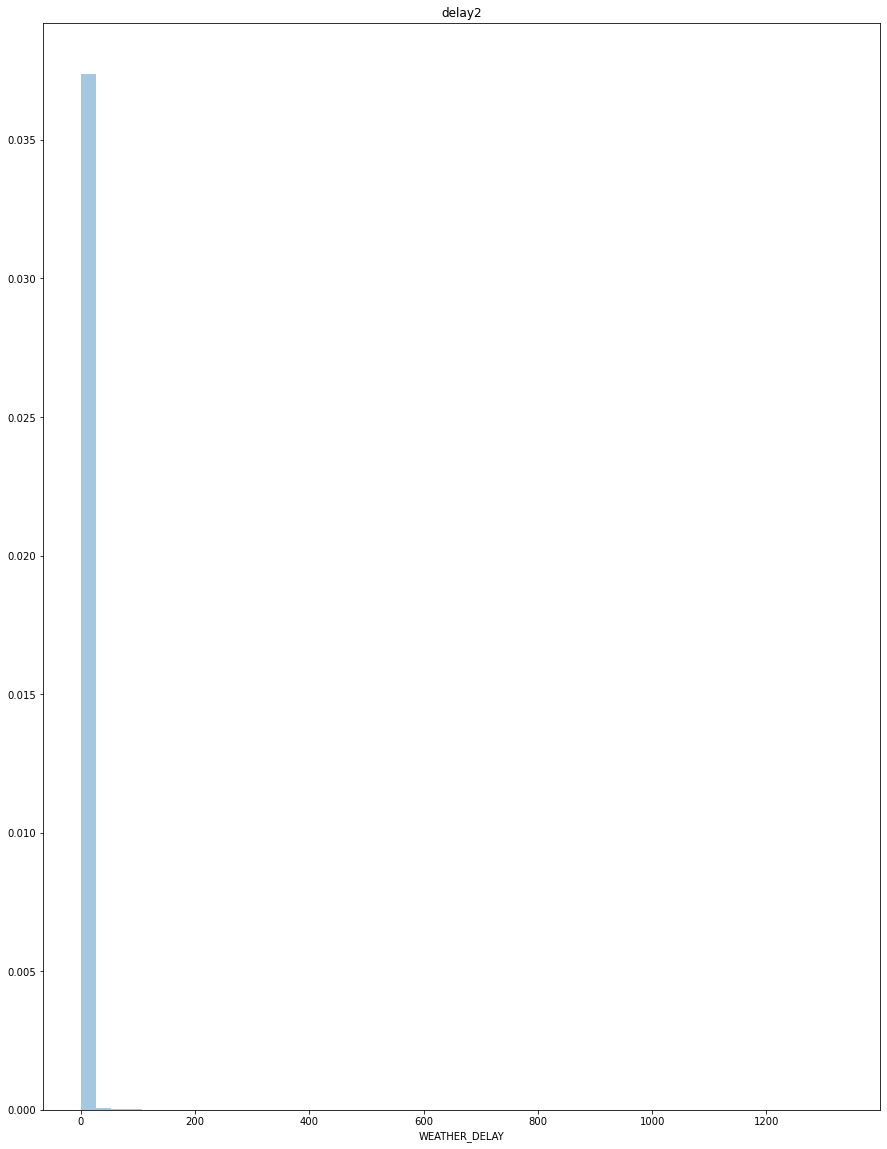

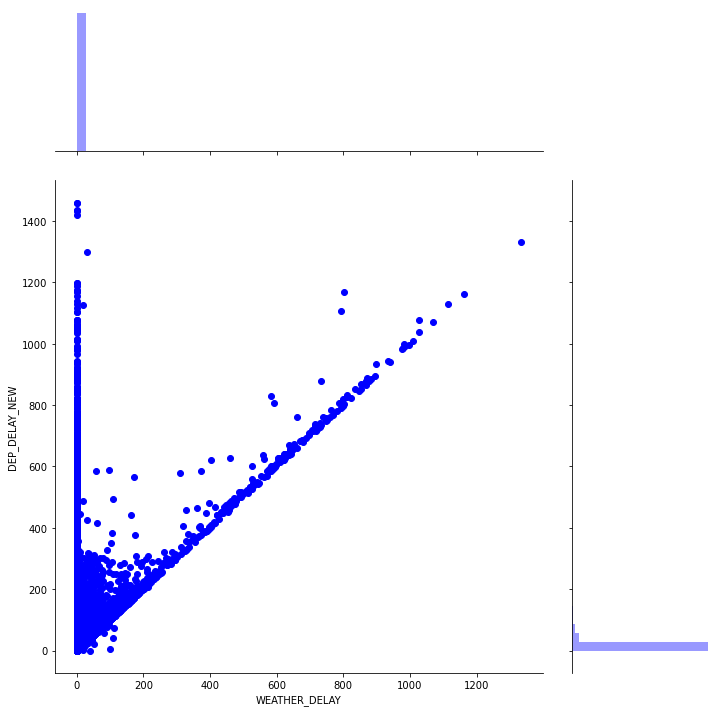

In [11]:
print(df1['WEATHER_DELAY'].value_counts())
plt.figure(figsize=(15,20))
plt.title("delay2")
sns.distplot(df1['WEATHER_DELAY'])
plt.show()
a1 = df1.shape[0]-df1['WEATHER_DELAY'].value_counts()[0]
a = sns.jointplot(y="DEP_DELAY_NEW", x="WEATHER_DELAY" ,data=df1, height=10,ratio=3,color="b")
#a.savefig('q.jpg')
plt.show()

C:\Users\13863\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


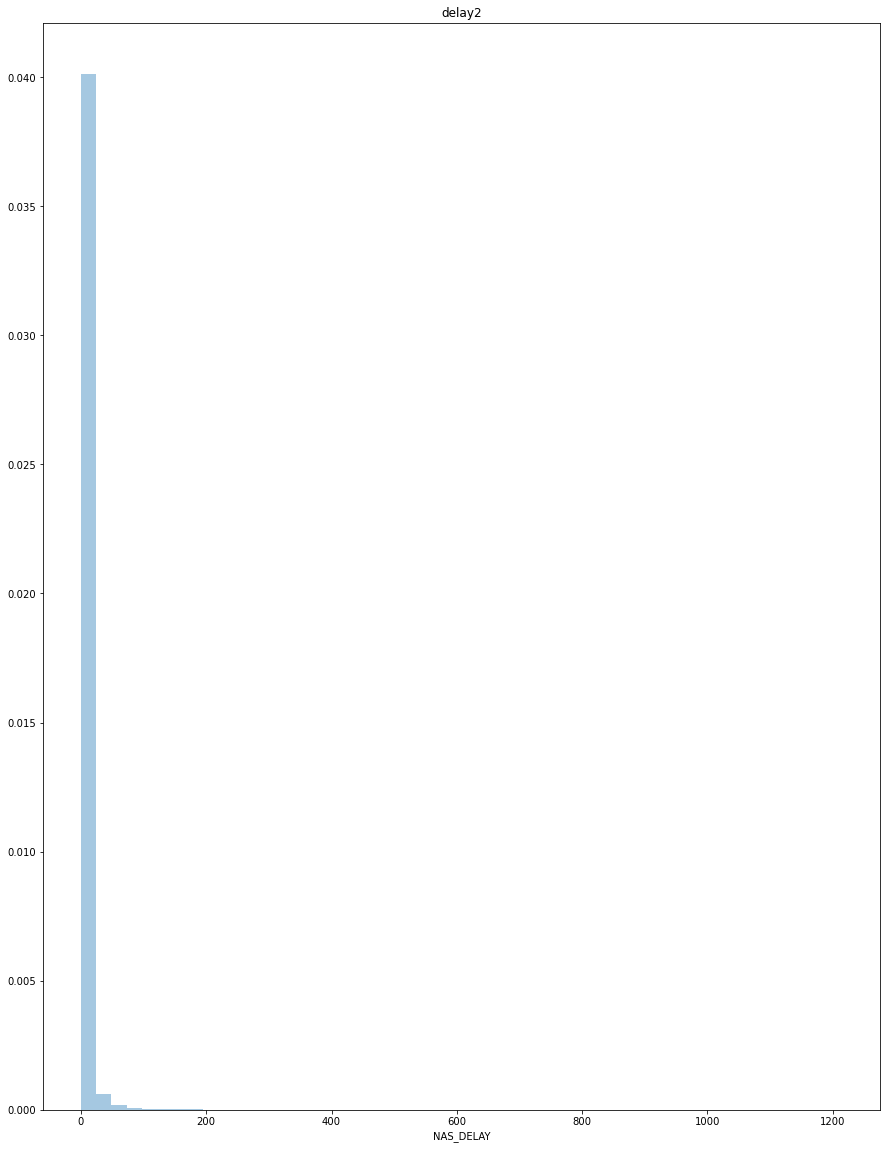

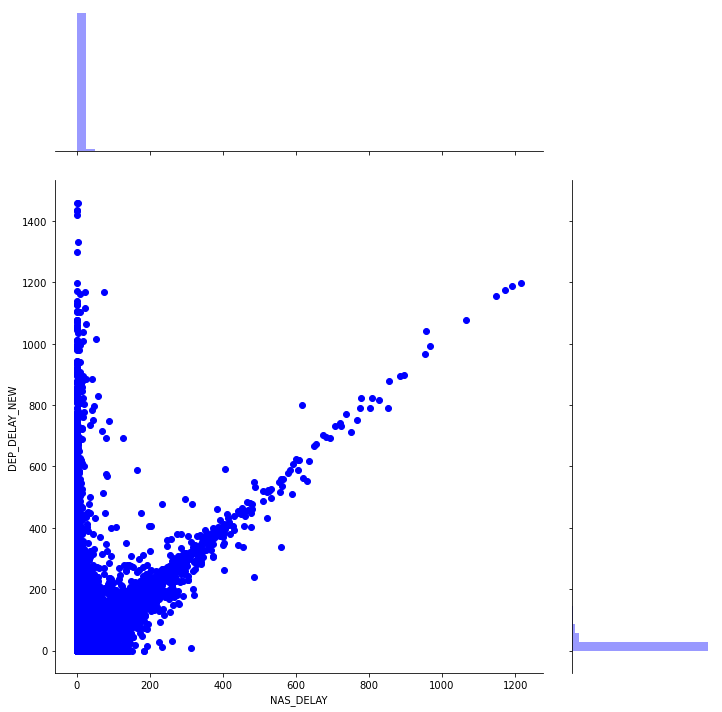

In [13]:
plt.figure(figsize=(15,20))
plt.title("delay2")
sns.distplot(df1['NAS_DELAY'])
plt.show()
a5 = df1.shape[0]-df1['NAS_DELAY'].value_counts()[0]
a = sns.jointplot(y="DEP_DELAY_NEW", x="NAS_DELAY" ,data=df1, height=10,ratio=3,color="b")
#a.savefig('q.jpg')
plt.show()

C:\Users\13863\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


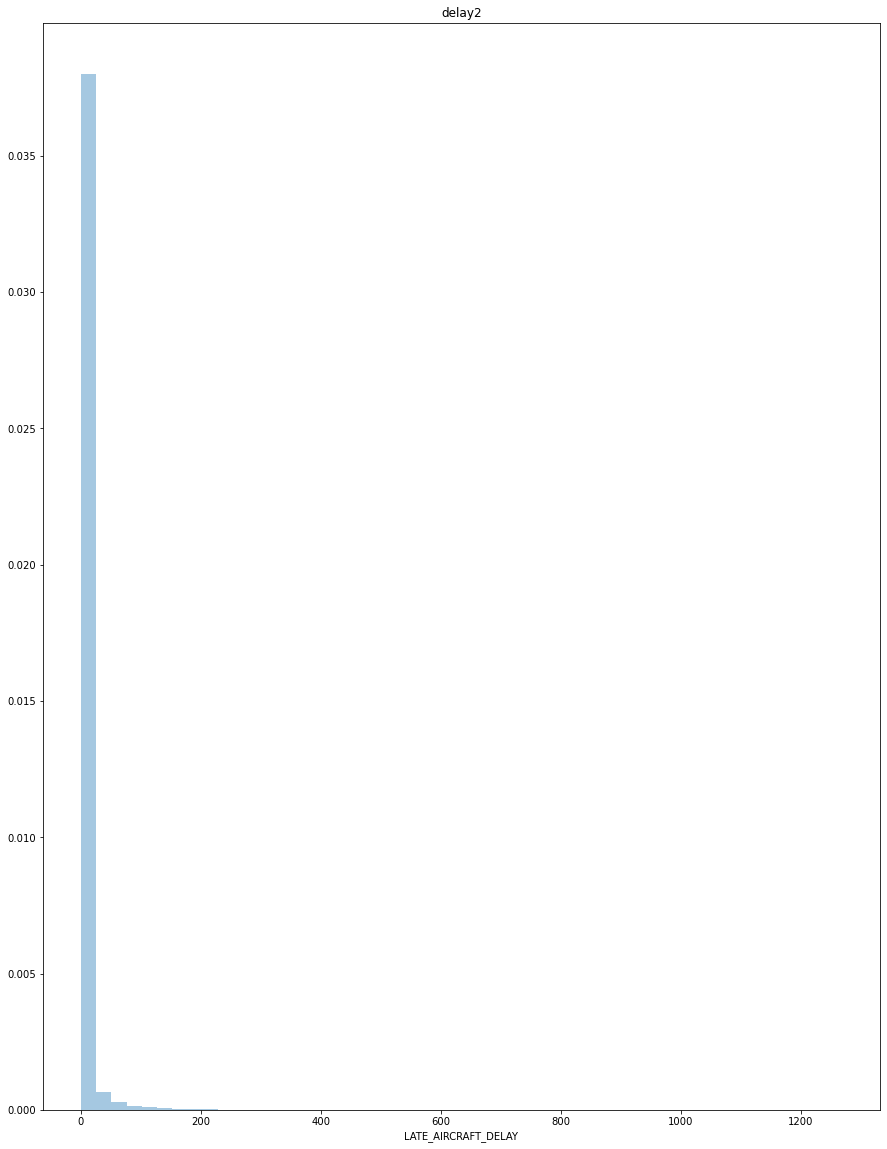

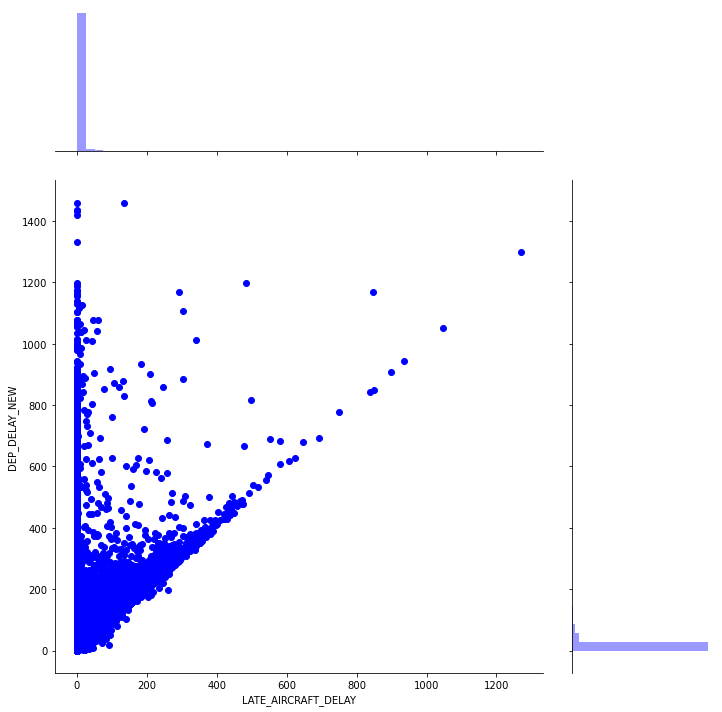

In [14]:
plt.figure(figsize=(15,20))
plt.title("delay2")
sns.distplot(df1['LATE_AIRCRAFT_DELAY'])
plt.show()
a2 = df1.shape[0]-df1['LATE_AIRCRAFT_DELAY'].value_counts()[0]
a = sns.jointplot(y="DEP_DELAY_NEW", x="LATE_AIRCRAFT_DELAY" ,data=df1, height=10,ratio=3,color="b")
#a.savefig('q.jpg')
plt.show()

C:\Users\13863\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


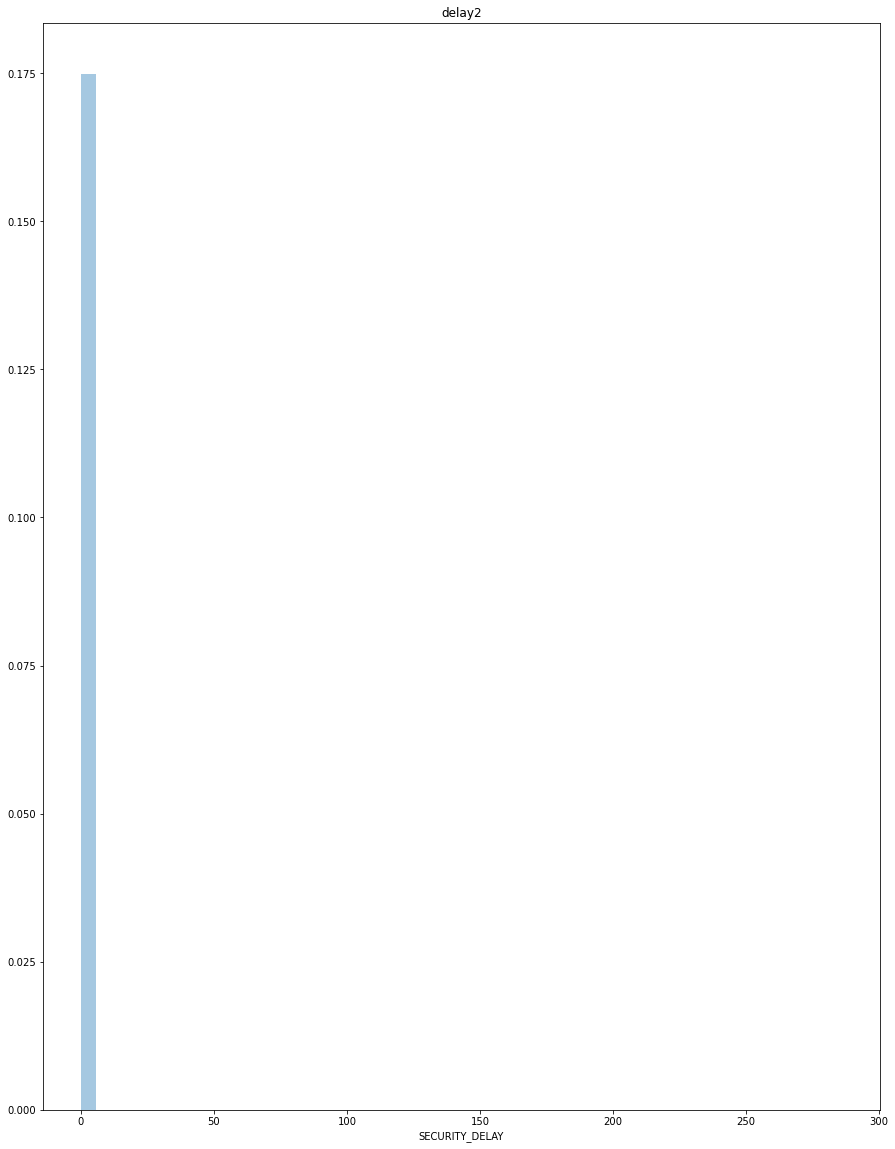

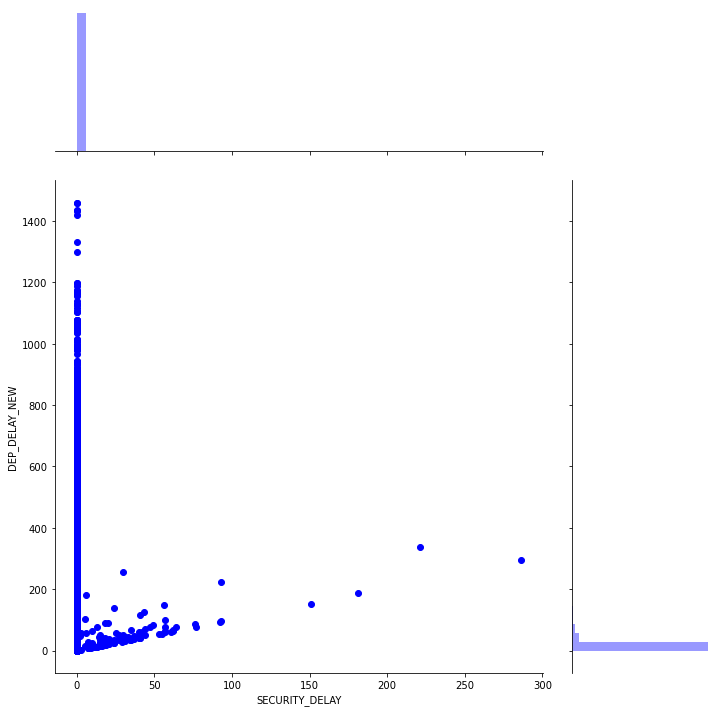

In [15]:
plt.figure(figsize=(15,20))
plt.title("delay2")
sns.distplot(df1['SECURITY_DELAY'])
plt.show()
a3 = df1.shape[0]-df1['SECURITY_DELAY'].value_counts()[0]
a = sns.jointplot(y="DEP_DELAY_NEW", x="SECURITY_DELAY" ,data=df1, height=10,ratio=3,color="b")
a.savefig('q.jpg')
plt.show()

C:\Users\13863\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


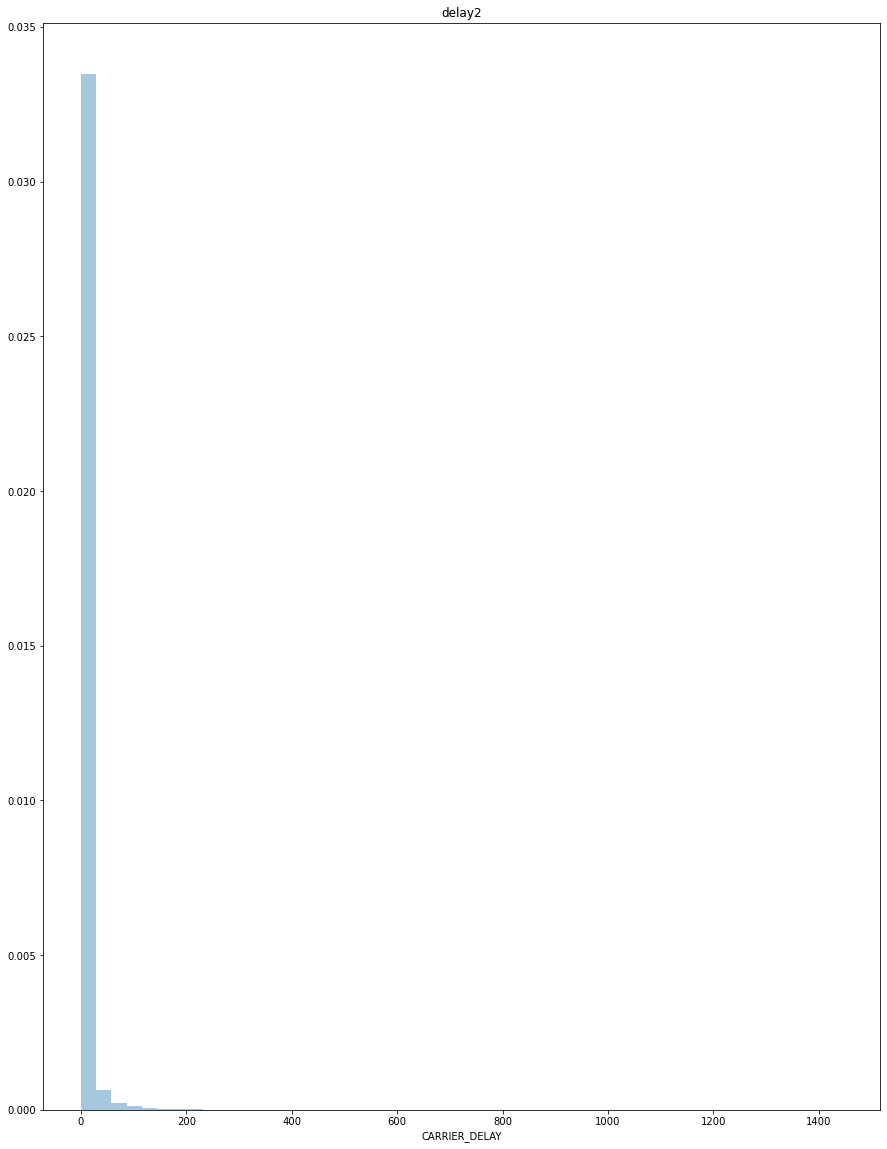

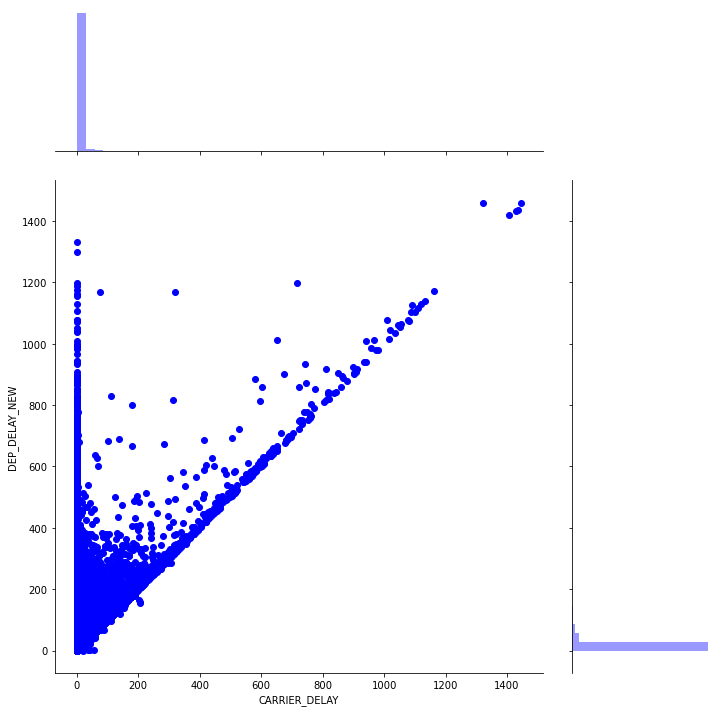

In [16]:
plt.figure(figsize=(15,20))
plt.title("delay2")
sns.distplot(df1['CARRIER_DELAY'])
plt.show()
a4 = df1.shape[0]-df1['CARRIER_DELAY'].value_counts()[0]
a = sns.jointplot(y="DEP_DELAY_NEW", x="CARRIER_DELAY" ,data=df1, height=10,ratio=3,color="b")
a.savefig('q.jpg')
plt.show()

In [28]:
print('weather delay\n',df1['WEATHER_DELAY'].describe())
print('carrier delay\n',df1['CARRIER_DELAY'].describe())
print('security delay\n',df1['SECURITY_DELAY'].describe())
print('late aircraft delay\n',df1['LATE_AIRCRAFT_DELAY'].describe())
print('NAS delay\n',df1['NAS_DELAY'].describe())
print('WEATHER_DELAY',a1,'\nCARRIER_DELAY',a4,'\nSECURITY_DELAY',a3,'\nLATE_AIRCRAFT_DELAY',a2,'\nNAS_DELAY',a5)
a1+a2+a3+a4+a5

weather delay
 count    421768.000000
mean          0.648134
std          14.859116
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1332.000000
Name: WEATHER_DELAY, dtype: float64
carrier delay
 count    421768.000000
mean          3.477338
std          22.629682
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1444.000000
Name: CARRIER_DELAY, dtype: float64
security delay
 count    421768.000000
mean          0.009275
std           0.869253
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         286.000000
Name: SECURITY_DELAY, dtype: float64
late aircraft delay
 count    421768.000000
mean          3.197843
std          18.477137
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1269.000000
Name: LATE_AIRCRAFT_DELAY, dtype: float64
NAS delay
 count    421768.000000
mean        

104438

In [43]:
print(df1.columns)
#df.drop(['Unnamed: 22'],axis=1,inplace=True)
df['count'] = 1
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'],format='%Y-%m-%d')
pf = df.drop(['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','OP_CARRIER_FL_NUM'],axis=1)
data1 =pf.loc[pf.ORIGIN_STATE_NM=='Georgia']
data1.shape[0]

Index(['FL_DATE', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_STATE_NM', 'DEST_AIRPORT_ID', 'DEST_STATE_NM', 'DEP_TIME',
       'DEP_DELAY_NEW', 'ARR_TIME', 'ARR_DELAY_NEW', 'CANCELLED', 'AIR_TIME',
       'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 22'],
      dtype='object')


421768

data and time framework, used fot merge weather data 

In [44]:
data1['FL_DATE'] = pd.to_datetime(data1['FL_DATE'],format='%Y-%m-%d')
data1['try'] = data1['FL_DATE'].apply(lambda x: x.strftime('%Y%m%d'))
data1['try'] = data1['try'].astype(float)
data1['DEP_TIME'].dropna(inplace=True)
data1['DEP_TIME'] = data1['DEP_TIME'].astype(int)
data1['time'] = data1['try'] *10000 + data1['DEP_TIME']
data1['time'].dropna(inplace=True)
data1['time'].isna().sum()
data1['time'] = data1['time'].astype('int64')
data1['time']= data1['time'].astype(str)
data1['time1'] = data1['time'].apply(lambda x : x[:8])
data1['time2'] = data1['time'].apply(lambda x : x[8:12])
data1['time3'] = data1['time'].apply(lambda x : x[:12])
#data1['time2'] = data1['time2'].astype(int)
#data1['time2'] = data['time2']*100
data1['time1'] = pd.to_datetime(data1['time1'],format='%Y-%m-%d')
data1['time2'] = pd.to_datetime(data1['time2'],format='%H%M',errors='coerce')
data1['time3'] = pd.to_datetime(data1['time3'],format='%Y%m%d%H%M',errors='coerce')
data1['time3'] = data1['time3'].astype(str)
data1['time3'].replace('NaT',np.nan,inplace=True)
data1['time3'].dropna(inplace= True)
data1['timestamp'] = data1['time3'].apply(lambda x:time.mktime(time.strptime(x,'%Y-%m-%d %H:%M:%S')))
#aa = data1.sort_values(by='DEP_TIME')
#aa.head(20)

<ipython-input-44-825b7b348bd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['FL_DATE'] = pd.to_datetime(data1['FL_DATE'],format='%Y-%m-%d')
<ipython-input-44-825b7b348bd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['try'] = data1['FL_DATE'].apply(lambda x: x.strftime('%Y%m%d'))
<ipython-input-44-825b7b348bd9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [45]:
weather = pd.read_csv('weather.csv')
weather['DATE1'] = weather['DATE'].apply(lambda x : x[:10])
weather['time'] = weather['DATE'].apply(lambda x: x[11:])
weather['DATE'] = weather['DATE1'] +weather['time'].apply(lambda x : x[:5])
weather['DATE'] = pd.to_datetime(weather['DATE'],format='%Y-%m-%d%H:%M')
weather['DATE'] = weather['DATE'].astype(str)
weather['timestamp'] = weather['DATE'].apply(lambda x:time.mktime(time.strptime(x,'%Y-%m-%d %H:%M:%S')))

merge weathe data and flight data

In [ ]:
data1['visibility'] = 0    # initilize data 
data1['WindDirection'] = 0
data1['WindSpeed'] = 0
data1['Humidity'] = 0
data1['temperature'] = 0
data1['presure'] = 0

for index, row in data1.iterrows():
    a = weather[weather.timestamp<data1.timestamp[index]].index.tolist()
    if (len(a) > 0):
        b = max(a)
        data1.visibility[index]=weather.HourlyVisibility[b]
        data1.WindDirection[index]=weather.HourlyWindDirection[b]
        data1.WindSpeed[index]=weather.HourlyWindSpeed[b]
        data1.Humidity[index]=weather.HourlyRelativeHumidity[b]
        data1.temperature[index]=weather.HourlyDryBulbTemperature[b]
        data1.presure[index]=weather.HourlyStationPressure[b]

<ipython-input-46-7542a21d8714>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['visibility'] = 0    # initilize data
<ipython-input-46-7542a21d8714>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['WindDirection'] = 0
<ipython-input-46-7542a21d8714>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i